In [31]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#preprocess.
from keras_preprocessing.image import ImageDataGenerator

#dl libraraies
from keras import backend as K
from keras import models
from keras import layers
from keras import optimizers
from keras import utils

# specifically for cnn
# from keras.layers import Dropout, Flatten,Activation
# from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
 
import tensorflow as tf
import random as rn

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

In [32]:
X=[]
Z=[]
IMG_SIZE=150
FLOWER_DAISY_DIR=r'C:\the work\Image recognition\flowers\daisy'
FLOWER_SUNFLOWER_DIR=r'C:\the work\Image recognition\flowers\sunflower'
FLOWER_TULIP_DIR=r'C:\the work\Image recognition\flowers\tulip'
FLOWER_DANDI_DIR=r'C:\the work\Image recognition\flowers\dandelion'
FLOWER_ROSE_DIR=r'C:\the work\Image recognition\flowers\rose'

In [33]:
def assign_label(img,flower_type):
    return flower_type

In [34]:
def make_train_data(flower_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,flower_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        X.append(np.array(img))
        Z.append(str(label))

In [35]:
make_train_data('Daisy',FLOWER_DAISY_DIR)
print(len(X))

100%|██████████| 764/764 [00:21<00:00, 34.89it/s]

764


In [36]:
make_train_data('Sunflower',FLOWER_SUNFLOWER_DIR)
print(len(X))

100%|██████████| 733/733 [00:11<00:00, 64.82it/s] 

1497


In [37]:
make_train_data('Tulip',FLOWER_TULIP_DIR)
print(len(X))

100%|██████████| 984/984 [00:19<00:00, 50.32it/s] 

2481


In [38]:
make_train_data('Dandelion',FLOWER_DANDI_DIR)
print(len(X))

100%|██████████| 1052/1052 [00:11<00:00, 88.92it/s]

3533


In [39]:
make_train_data('Rose',FLOWER_ROSE_DIR)
print(len(X))

100%|██████████| 784/784 [00:07<00:00, 104.26it/s]

4317


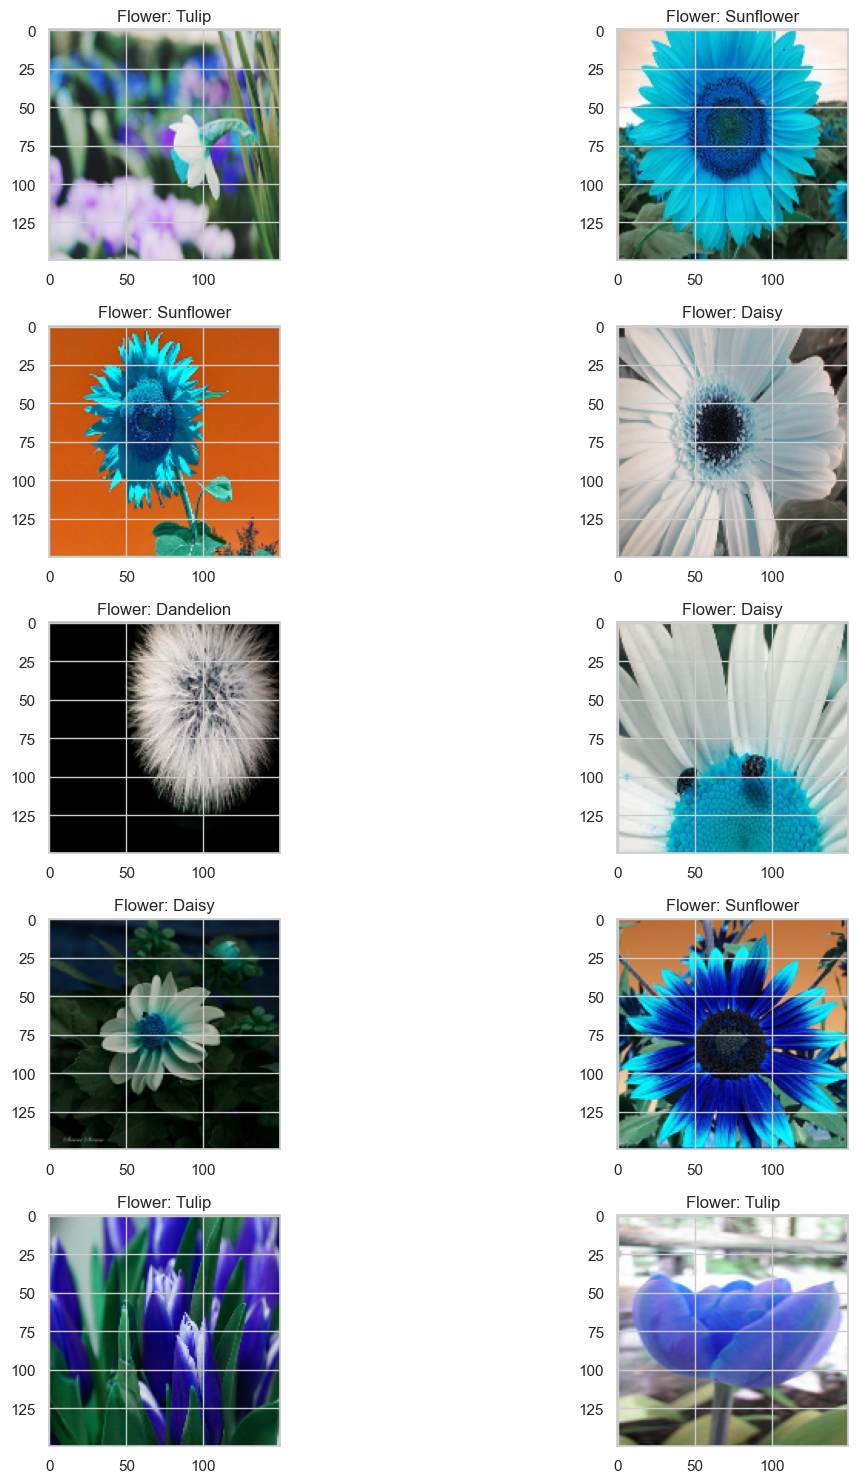

In [40]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Flower: '+Z[l])
        
plt.tight_layout()
        

In [41]:
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=utils.to_categorical(Y,5)
X=np.array(X)
X=X/255


In [42]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)


In [43]:
# # modelling starts using a CNN.

model = models.Sequential()
model.add(layers.Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
model.add(layers.MaxPooling2D(pool_size=(2,2)))


model.add(layers.Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

model.add(layers.Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(layers.Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(512))
model.add(layers.Activation('relu'))
model.add(layers.Dense(5, activation = "softmax"))

In [76]:
batch_size=128

from keras import callbacks
red_lr= callbacks.ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

In [77]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [78]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [79]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 150, 150, 32)   │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 75, 75, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 37, 37, 96)     │        55,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 18, 18, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 18, 18, 96)     │        83,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 9, 9, 96)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 7776)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     3,981,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │         2,565 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,143,749 (15.81 MB)

 Trainable params: 4,143,749 (15.81 MB)

 Non-trainable params: 0 (0.00 B)

In [84]:
History = model.fit(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs =10, validation_data = (x_test,y_test),
                              steps_per_epoch=x_train.shape[0] // batch_size)
# model.fit(x_train,y_train,epochs=epochs,batch_size=batch_size,validation_data = (x_test,y_test))

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 294s 8s/step - accuracy: 0.8572 - loss: 0.3855 - val_accuracy: 0.8130 - val_loss: 0.5582
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 300ms/step - accuracy: 0.8906 - loss: 0.3453 - val_accuracy: 0.8019 - val_loss: 0.5846
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 74s 3s/step - accuracy: 0.8667 - loss: 0.3615 - val_accuracy: 0.7870 - val_loss: 0.6241
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 213ms/step - accuracy: 0.8828 - loss: 0.3354 - val_accuracy: 0.7880 - val_loss: 0.6635
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 73s 3s/step - accuracy: 0.8608 - loss: 0.3787 - val_accuracy: 0.8056 - val_loss: 0.5481
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 202ms/step - accuracy: 0.8828 - loss: 0.3475 - val_accuracy: 0.8111 - val_loss: 0.5533
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 72s 3s/step - accuracy: 0.8919 - loss: 0.3062 - val_accuracy: 0.8056 - val_loss: 0.5665
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 199ms/step - accuracy: 0.8438 - loss: 0.3907 - val_accuracy: 0.8130 -

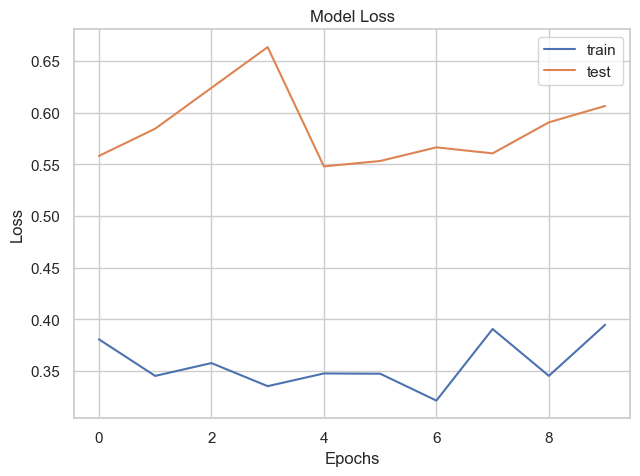

In [85]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

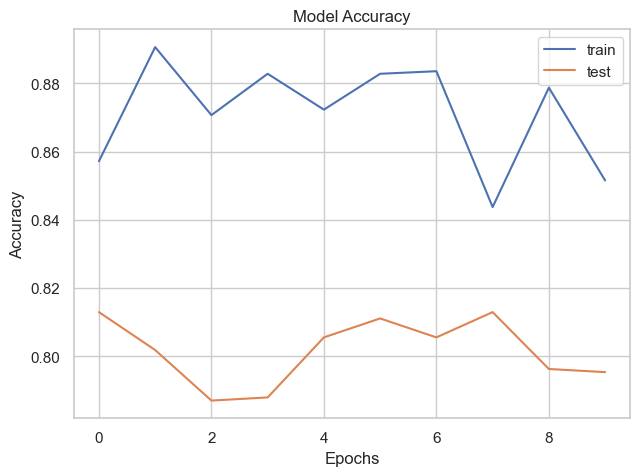

In [86]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()
